In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import math
import matplotlib.pyplot as plt
from scipy.stats import norm, entropy 
from scipy.stats import probplot
import matplotlib.pyplot as plt
from scipy.stats import logistic
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.utils import resample
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from scipy.spatial.distance import cosine, correlation
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import Perceptron

In [2]:
df  = pd.read_csv('/Users/hiteshbhatia/Downloads/chs2015_public.csv')

**Pre Processing the Data**
We will first proceed with doing the analysis on the HIV Testing. We will be analysing the HIV with the general health as the target variable.

In [3]:
hiv_df = df[['cid','hiv12months15','everhivtest15','generalhealth']]
#Checking the null values
hiv_df.isnull().sum()

cid                0
hiv12months15    224
everhivtest15    343
generalhealth     68
dtype: int64

In [4]:
#Dropping all the columns having the Null values
hiv_df = hiv_df.dropna()
hiv_df.describe()

,cid,hiv12months15,everhivtest15,generalhealth
count,9.645000e+03,9645.000000,9645.000000,9645.000000
mean,1.607488e+06,1.669984,1.365060,2.734059
std,5.167118e+03,0.470243,0.481472,1.138704
min,1.600001e+06,1.000000,1.000000,1.000000
25%,1.602550e+06,1.000000,1.000000,2.000000
50%,1.605120e+06,2.000000,1.000000,3.000000
75%,1.612471e+06,2.000000,2.000000,3.000000
max,1.614998e+06,2.000000,2.000000,5.000000


In [5]:
corr_1 = hiv_df.corr()
corr_1

,cid,hiv12months15,everhivtest15,generalhealth
cid,1.000000,-0.094406,-0.117997,-0.071924
hiv12months15,-0.094406,1.000000,0.532170,-0.013263
everhivtest15,-0.117997,0.532170,1.000000,0.061350
generalhealth,-0.071924,-0.013263,0.061350,1.000000


It seems like the variable **hiv12months15** (Have you had an HIV test in the last 12 months?) is very less correlated and thus can be dropped.

# Prediction / RMSE

In [6]:
#[1]https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
#[2]https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.random_projection import sparse_random_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from math import sqrt

#function for rmse calculation of model
def model_apply(x,y,algo,n):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)
    scaler = StandardScaler()
    # Fit on training set only.
    scaler.fit(x_train)
    # Apply transform to both the training set and the test set.
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    
    pca = PCA(n_components=n,tol=.95)
    pca.fit(x_test)
    print(pca.explained_variance_ratio_) 
    
    x_train = pca.transform(x_train)
    x_test = pca.transform(x_test)
    
#     principalDf = pd.DataFrame(data = x_train
#              , columns = ['pc1', 'pc2','pc3'])
#     print(principalDf)

    #model selection
    if algo==1:
        model=LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=200)
    elif algo==2:
        model=GaussianNB()
    elif algo==3:
        model=DecisionTreeClassifier()
    elif algo==4:
        model=svm.SVC(gamma='scale')
    elif algo==5:
        model=Perceptron(tol=1e-3, random_state=0)
        
        # Train the model using the training sets
    model.fit(x_train,y_train.values.ravel())

    # Predict Output
    y_pred = model.predict(x_test)
    print ("Predicted Value:", y_pred)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    return(rmse)

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

In [7]:
#preparing training and test data
x=hiv_df[["everhivtest15"]] 
y=hiv_df[["generalhealth"]] 

In [8]:
model_apply(x,y,3,1)

[1.]
Predicted Value: [3. 3. 3. ... 3. 3. 3.]
Accuracy: 0.3271144278606965
[[  0   0 382   0   0]
 [  0   0 661   0   0]
 [  0   0 789   0   0]
 [  0   0 416   0   0]
 [  0   0 164   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       382
         2.0       0.00      0.00      0.00       661
         3.0       0.33      1.00      0.49       789
         4.0       0.00      0.00      0.00       416
         5.0       0.00      0.00      0.00       164

    accuracy                           0.33      2412
   macro avg       0.07      0.20      0.10      2412
weighted avg       0.11      0.33      0.16      2412



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1.1627510695549774

**Analysing the Immunization Data**

In [9]:
imm_df = df[['cid','fluvaccineshot','generalhealth']]
imm_df.isnull().sum()

cid                0
fluvaccineshot    59
generalhealth     68
dtype: int64

In [10]:
imm_df = imm_df.dropna()
imm_df.describe()

,cid,fluvaccineshot,generalhealth
count,1.004700e+04,10047.000000,10047.000000
mean,1.607455e+06,1.515378,2.740520
std,5.169004e+03,0.499788,1.140993
min,1.600001e+06,1.000000,1.000000
25%,1.602540e+06,1.000000,2.000000
50%,1.605086e+06,2.000000,3.000000
75%,1.612450e+06,2.000000,4.000000
max,1.614998e+06,2.000000,5.000000


In [11]:
corr_2 = imm_df.corr()
corr_2

,cid,fluvaccineshot,generalhealth
cid,1.000000,0.122398,-0.076953
fluvaccineshot,0.122398,1.000000,-0.086652
generalhealth,-0.076953,-0.086652,1.000000


The variable fluvaccineshot (During the past 12 months, have you had a flu shot in your arm or a flu vaccine that was sprayed in your nose?) is negatively correlated with the general health and thus we can drop this feature.

In [12]:
#preparing training and test data
x=imm_df[["fluvaccineshot"]] 
y=imm_df[["generalhealth"]] 

In [13]:
model_apply(x,y,3,1)

[1.]
Predicted Value: [3. 3. 3. ... 3. 3. 3.]
Accuracy: 0.31727707006369427
[[  0   0 412   0   0]
 [  0   0 654   0   0]
 [  0   0 797   0   0]
 [  0   0 462   0   0]
 [  0   0 187   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       412
         2.0       0.00      0.00      0.00       654
         3.0       0.32      1.00      0.48       797
         4.0       0.00      0.00      0.00       462
         5.0       0.00      0.00      0.00       187

    accuracy                           0.32      2512
   macro avg       0.06      0.20      0.10      2512
weighted avg       0.10      0.32      0.15      2512



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1.182408208688743

**Analysing the Sexual Behavior**

In [14]:
sex_df = df[['cid','sexbehav_active15','sexuallyactive15','sexpartner','wsw','wswexclusive','msm','msmexclusive','condom15','condomusetrend','analsex','analsexcondomuse15','generalhealth']]
sex_df.isnull().sum()

cid                      0
sexbehav_active15     4224
sexuallyactive15       959
sexpartner             959
wsw                   7060
wswexclusive          7041
msm                   7370
msmexclusive          7359
condom15              4357
condomusetrend        5226
analsex               4389
analsexcondomuse15    9697
generalhealth           68
dtype: int64

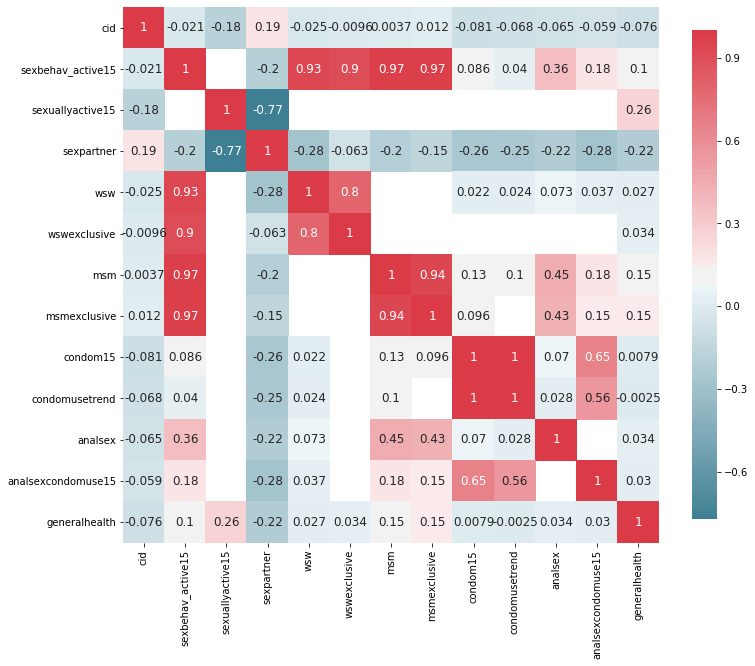

In [15]:
plot_correlation_map(sex_df)

Among all the features in the Sexual Behavior, only 3 features looks useful to me. **imputed_sexuallyactive18**(Sexually active in past 12 months), **imputed_sexpartner** (Number of male and female sex partners in the past 12 months) and **pcpsexhistory** (Thinking about the last time you visited your personal doctor or health care provider, did he or she ask you any questions about your sexual history?).

In [16]:
sex_df = df[['cid','sexuallyactive15','sexpartner','generalhealth']]
sex_df.isnull().sum()


cid                   0
sexuallyactive15    959
sexpartner          959
generalhealth        68
dtype: int64

In [17]:
sex_df_f = sex_df.dropna()
sex_df_f.describe()

,cid,sexuallyactive15,sexpartner,generalhealth
count,9.157000e+03,9157.000000,9157.000000,9157.000000
mean,1.607485e+06,1.352408,1.810309,2.757235
std,5.166600e+03,0.477746,0.774167,1.150595
min,1.600001e+06,1.000000,1.000000,1.000000
25%,1.602555e+06,1.000000,1.000000,2.000000
50%,1.605119e+06,1.000000,2.000000,3.000000
75%,1.612473e+06,2.000000,2.000000,4.000000
max,1.614998e+06,2.000000,4.000000,5.000000


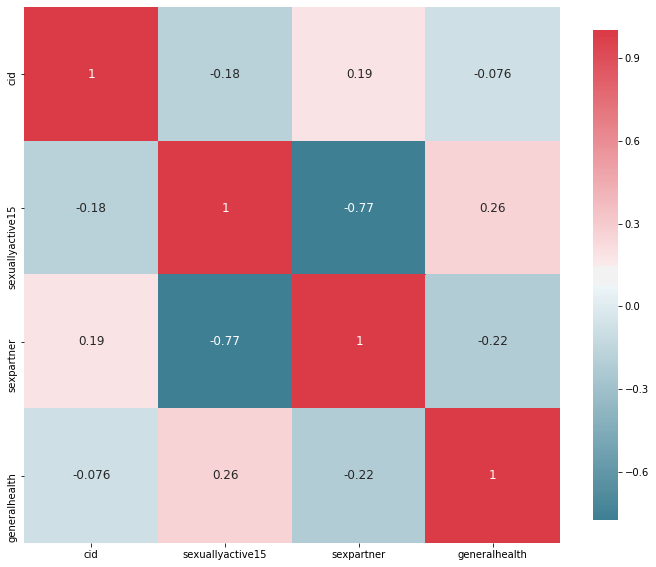

In [18]:
plot_correlation_map(sex_df)

Let us use the above 3 features to predict the general health.

In [21]:
#preparing training and test data
x=sex_df_f[['sexuallyactive15','sexpartner']] 
y=sex_df_f[["generalhealth"]] 

In [22]:
model_apply(x,y,3,2)

[0.88645533 0.11354467]
Predicted Value: [3. 3. 3. ... 2. 3. 3.]
Accuracy: 0.3174672489082969
[[  0  29 333   0   0]
 [  0  35 560   0   0]
 [  0  40 692   0   0]
 [  0  23 386   0   0]
 [  0   4 188   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       362
         2.0       0.27      0.06      0.10       595
         3.0       0.32      0.95      0.48       732
         4.0       0.00      0.00      0.00       409
         5.0       0.00      0.00      0.00       192

    accuracy                           0.32      2290
   macro avg       0.12      0.20      0.12      2290
weighted avg       0.17      0.32      0.18      2290



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1.1870847929599873

**Analysing the Cancer Screening Data**

# Clubbing it All together

In [23]:
club_df = df[['cid','everhivtest15','fluvaccineshot','sexuallyactive15','sexpartner','generalhealth']]
club_df.isnull().sum()

cid                   0
everhivtest15       343
fluvaccineshot       59
sexuallyactive15    959
sexpartner          959
generalhealth        68
dtype: int64

In [24]:
club_df = club_df.dropna()
club_df.describe()

,cid,everhivtest15,fluvaccineshot,sexuallyactive15,sexpartner,generalhealth
count,8.826000e+03,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000
mean,1.607507e+06,1.353048,1.511783,1.347609,1.816678,2.753116
std,5.164216e+03,0.477944,0.499889,0.476238,0.774332,1.150294
min,1.600001e+06,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.602567e+06,1.000000,1.000000,1.000000,1.000000,2.000000
50%,1.605138e+06,1.000000,2.000000,1.000000,2.000000,3.000000
75%,1.612483e+06,2.000000,2.000000,2.000000,2.000000,4.000000
max,1.614998e+06,2.000000,2.000000,2.000000,4.000000,5.000000


In [25]:
#preparing training and test data
x=club_df[['everhivtest15','fluvaccineshot','sexuallyactive15','sexpartner']] 
y=club_df[["generalhealth"]] 

In [27]:
model_apply(x,y,3,4)

[0.49091801 0.24142947 0.21083298 0.05681955]
Predicted Value: [2. 3. 4. ... 2. 3. 3.]
Accuracy: 0.3443588581785229
[[  0  73 269  20   0]
 [  0  95 438  46   0]
 [  0  82 584  63   0]
 [  0  38 264  81   0]
 [  0  10 105  39   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       362
         2.0       0.32      0.16      0.22       579
         3.0       0.35      0.80      0.49       729
         4.0       0.33      0.21      0.26       383
         5.0       0.00      0.00      0.00       154

    accuracy                           0.34      2207
   macro avg       0.20      0.24      0.19      2207
weighted avg       0.26      0.34      0.26      2207



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1.177688673499952

**Correlating Number of Sex Partners with the HIV**

In [28]:
hiv_sp_df = df[['everhivtest15','sexpartner']]
hiv_sp_df.isnull().sum()

everhivtest15    343
sexpartner       959
dtype: int64

In [29]:
hiv_sp_df = hiv_sp_df.dropna()
hiv_sp_df.describe()

,everhivtest15,sexpartner
count,8918.000000,8918.000000
mean,1.353442,1.814981
std,0.478065,0.775358
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,2.000000
max,2.000000,4.000000


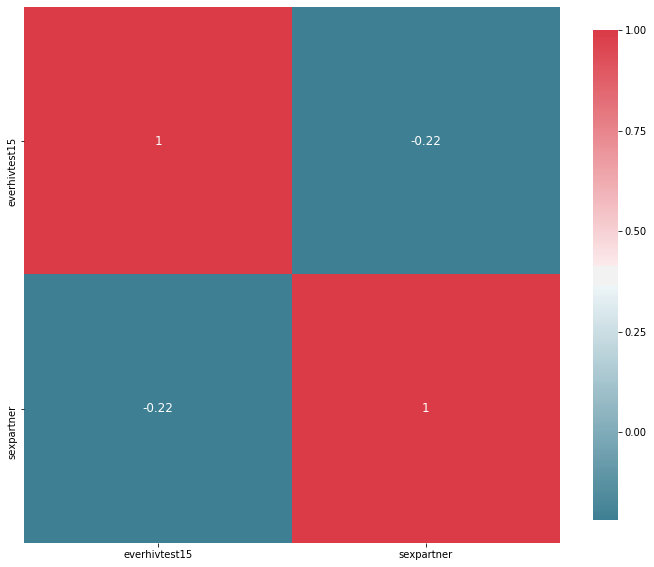

In [30]:
plot_correlation_map(hiv_sp_df)

In [32]:
#preparing training and test data
x=hiv_sp_df[["everhivtest15"]] 
y=hiv_sp_df[["sexpartner"]] 

In [33]:
model_apply(x,y,3,1)

[1.]
Predicted Value: [2. 2. 1. ... 1. 2. 1.]
Accuracy: 0.5690582959641256
[[416 378   0   0]
 [343 853   0   0]
 [ 19  85   0   0]
 [ 21 115   0   0]]
              precision    recall  f1-score   support

         1.0       0.52      0.52      0.52       794
         2.0       0.60      0.71      0.65      1196
         3.0       0.00      0.00      0.00       104
         4.0       0.00      0.00      0.00       136

    accuracy                           0.57      2230
   macro avg       0.28      0.31      0.29      2230
weighted avg       0.51      0.57      0.53      2230



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8285813690892366